In [1]:
import yfinance as yf

In [2]:
df=yf.download("WIPRO.NS")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,1.125000,1.125000,1.125000,1.125000,0.910128,19999
1996-01-02,1.037500,1.037500,1.037500,1.037500,0.839340,39999
1996-01-03,1.075000,1.075000,1.075000,1.075000,0.869677,19999
1996-01-04,1.075000,1.075000,1.075000,1.075000,0.869677,119999
1996-01-05,1.075000,1.075000,1.075000,1.075000,0.869677,0
...,...,...,...,...,...,...
2023-11-10,380.299988,381.799988,377.000000,379.299988,379.299988,5355350
2023-11-13,382.600006,382.899994,380.000000,381.649994,381.649994,1792951
2023-11-15,385.549988,392.250000,384.250000,391.649994,391.649994,5396259


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,1.1250,1.1250,1.1250,1.1250,0.910128,19999
1996-01-02,1.0375,1.0375,1.0375,1.0375,0.839340,39999
1996-01-03,1.0750,1.0750,1.0750,1.0750,0.869677,19999
1996-01-04,1.0750,1.0750,1.0750,1.0750,0.869677,119999
1996-01-05,1.0750,1.0750,1.0750,1.0750,0.869677,0


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-10,380.299988,381.799988,377.000000,379.299988,379.299988,5355350
2023-11-13,382.600006,382.899994,380.000000,381.649994,381.649994,1792951
2023-11-15,385.549988,392.250000,384.250000,391.649994,391.649994,5396259
2023-11-16,391.649994,399.500000,389.299988,397.100006,397.100006,6921788
2023-11-17,398.000000,399.000000,394.500000,395.399994,395.399994,3942772


In [6]:
import matplotlib.pyplot as plt

# Historical Data Visualization

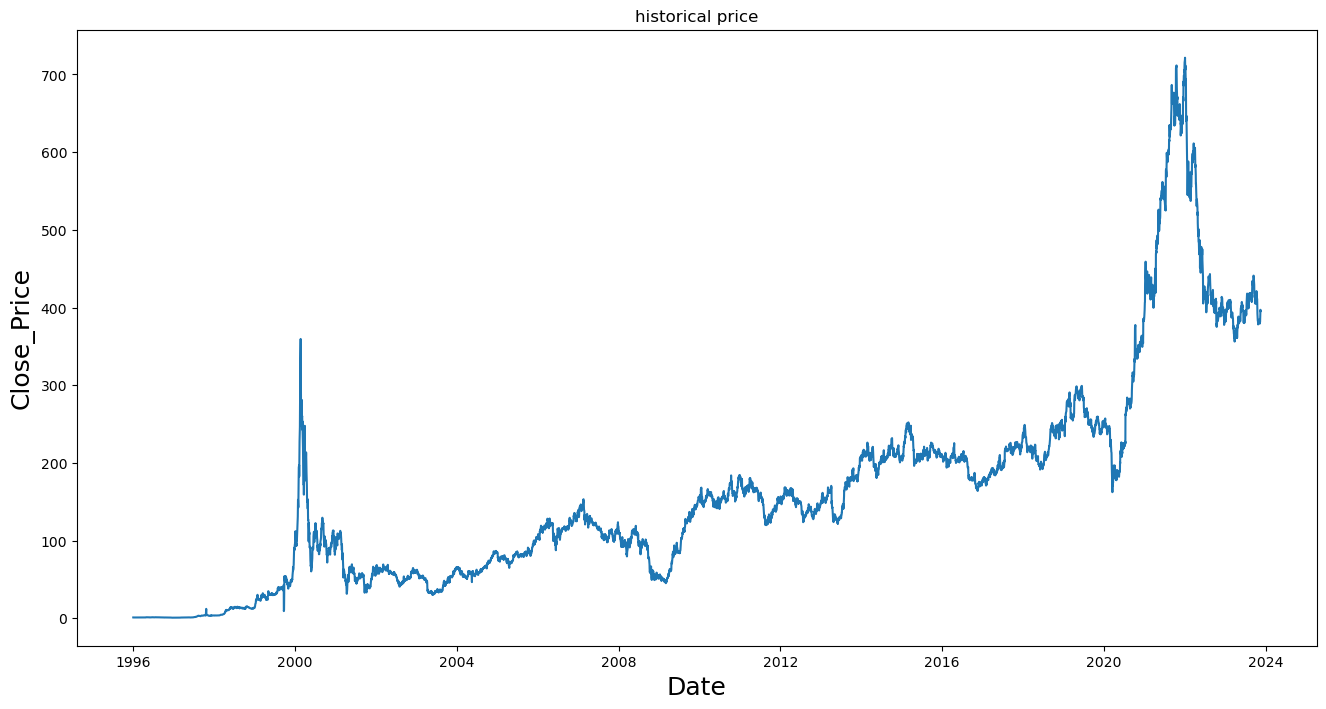

In [7]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [8]:
import numpy as np

In [9]:
data = df.filter(['Close'])
df = np.array(data).reshape(-1,1)
df

array([[  1.125     ],
       [  1.03750002],
       [  1.07500005],
       ...,
       [391.6499939 ],
       [397.1000061 ],
       [395.3999939 ]])

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))
scaled_df

array([[4.96023166e-04],
       [3.74618934e-04],
       [4.26649366e-04],
       ...,
       [5.42340596e-01],
       [5.49902365e-01],
       [5.47543636e-01]])

In [12]:
import math 

In [13]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

5608

In [14]:
train_data = scaled_df[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00049602, 0.00037462, 0.00042665, 0.00042665, 0.00042665,
       0.00042665, 0.00042665, 0.00042873, 0.00042665, 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00041971, 0.00039196,
       0.00041971, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.00039196, 0.00038   , 0.00038   , 0.00038   , 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.0004263 , 0.0004263 , 0.0004263 , 0.0004263 , 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00044399, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00048735,
       0.00048735, 0.00049602, 0.00039214, 0.00039214, 0.00041277,
       0.00046134, 0.00046151, 0.00046151, 0.00046151, 0.00046151])]
[0.00046150960565661376]



In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5548, 60, 1)

# Modeling

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=40, epochs=20)

Epoch 1/20
139/139 [==============================] - 20s 81ms/step - loss: 0.0011
Epoch 2/20
139/139 [==============================] - 11s 80ms/step - loss: 1.1402e-04
Epoch 3/20
139/139 [==============================] - 11s 80ms/step - loss: 1.0156e-04
Epoch 4/20
139/139 [==============================] - 11s 81ms/step - loss: 8.1378e-05
Epoch 5/20
139/139 [==============================] - 11s 81ms/step - loss: 7.6777e-05
Epoch 6/20
139/139 [==============================] - 11s 81ms/step - loss: 7.2485e-05
Epoch 7/20
139/139 [==============================] - 11s 80ms/step - loss: 6.7093e-05
Epoch 8/20
139/139 [==============================] - 11s 81ms/step - loss: 6.0505e-05
Epoch 9/20
139/139 [==============================] - 11s 79ms/step - loss: 6.0972e-05
Epoch 10/20
139/139 [==============================] - 11s 81ms/step - loss: 5.7643e-05
Epoch 11/20
139/139 [==============================] - 11s 81ms/step - loss: 5.8999e-05
Epoch 12/20
139/139 [========================

In [19]:
test_data = scaled_df[training_data_len - 60: , :]
x_test = []
y_test = df[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [20]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

44/44 [==============================] - 5s 36ms/step


5.181214010154299

# Visualization of Test Data VS Predicted Data

C:\Users\forev\AppData\Local\Temp\ipykernel_14912\3699947006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['predictions'] = predictions


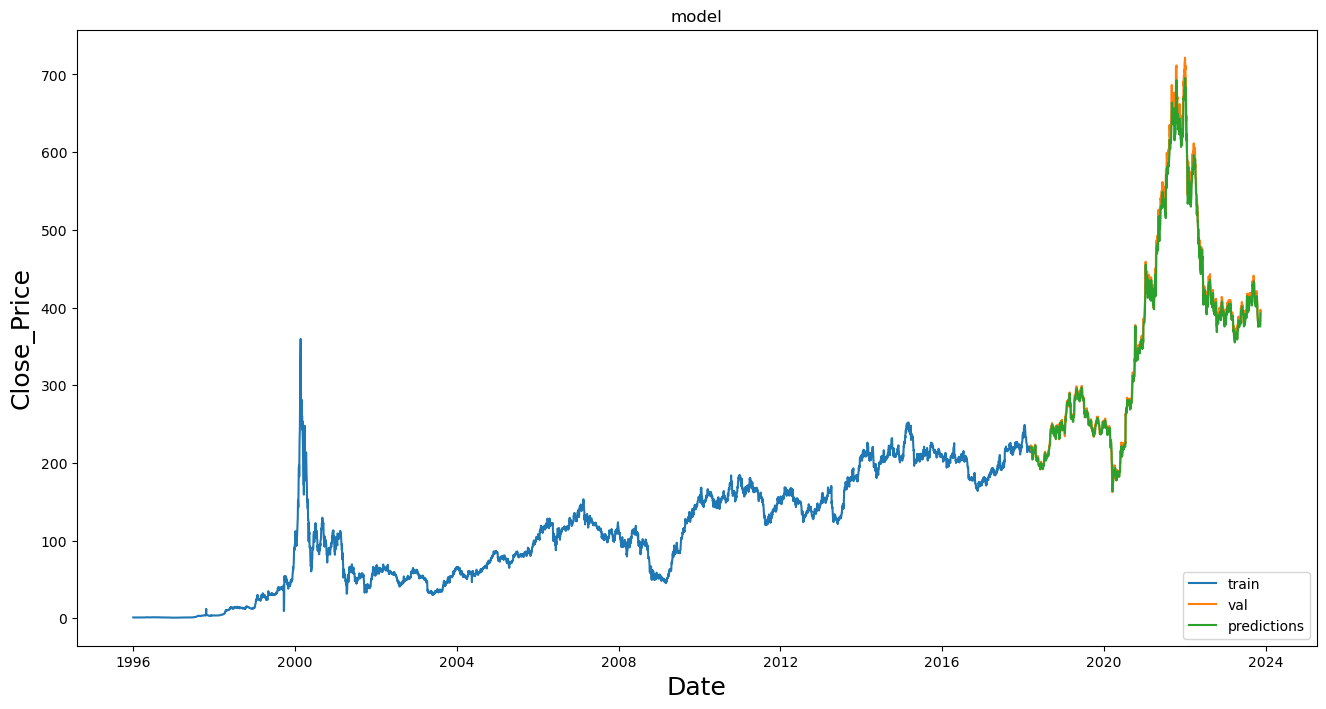

In [22]:
train = data[:training_data_len]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

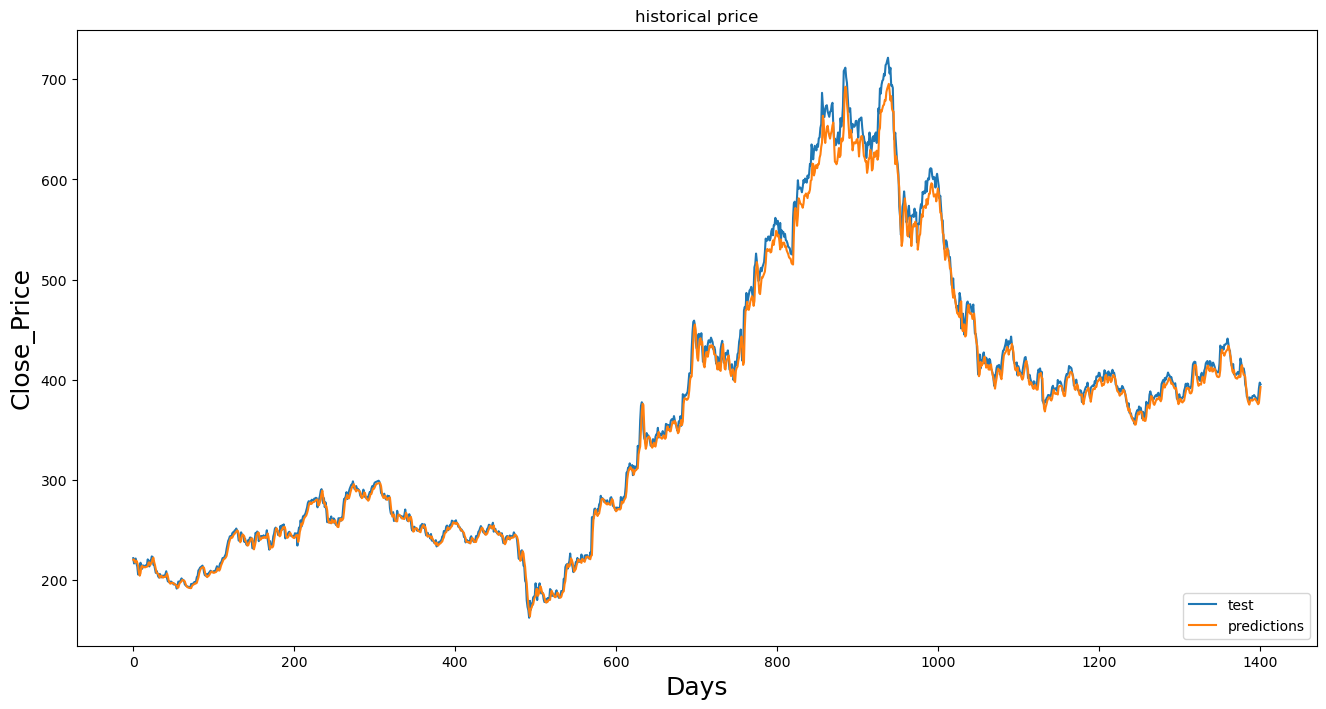

In [23]:
test = df[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()